In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##### Funciones auxiliares para extraer el tipo de gráfico y de variables del output del ViT

In [53]:
def get_mark_type(str):

    start = str.find("<mark>")
    end = str.find("</mark>")
    
    if start != -1 and end != -1: return str[start+6:end]
    return ""

def get_var_types(str):
    
    start1 = str.find("<type>")
    end1 = str.find("</type>")
    
    if start1 != -1 and end1 != -1: 
        
        start2 = str.find("<type>", end1+1)
        end2 = str.find("</type>", end1+1)
        
        return str[start1+6:end1], str[start2+6:end2]
    
    return "",""

##### Distribución de los tipos de variables según el tipo de gráfico

In [54]:
dataset_train = pd.read_csv("dataset/train/metadata.csv")
dataset_test = pd.read_csv("dataset/test/metadata.csv")
dataset_web = pd.read_csv("dataset_web/test/metadata.csv")
dataset_plotqa = pd.read_csv("dataset_plotqa/test/metadata.csv")

##### Separación según tipo de gráficos, por cada dataset

In [55]:
indexed_train = {"bar":[], "line":[], "point":[]}
indexed_test = {"bar":[], "line":[], "point":[]}
indexed_web = {"bar":[], "line":[], "point":[]}
indexed_plotqa = {"bar":[], "line":[], "point":[]}

for (i,x) in enumerate(list(dataset_train["text"])):
    
    if get_mark_type(x) == "bar": indexed_train["bar"].append((i,x))
    if get_mark_type(x) == "line": indexed_train["line"].append((i,x))
    if get_mark_type(x) == "point": indexed_train["point"].append((i,x))

for (i,x) in enumerate(list(dataset_test["text"])):
    
    if get_mark_type(x) == "bar": indexed_test["bar"].append((i,x))
    if get_mark_type(x) == "line": indexed_test["line"].append((i,x))
    if get_mark_type(x) == "point": indexed_test["point"].append((i,x))

for (i,x) in enumerate(list(dataset_web["text"])):
    
    if get_mark_type(x) == "bar": indexed_web["bar"].append((i,x))
    if get_mark_type(x) == "line": indexed_web["line"].append((i,x))
    if get_mark_type(x) == "point": indexed_web["point"].append((i,x))

for (i,x) in enumerate(list(dataset_plotqa["text"])):
    
    if get_mark_type(x) == "bar": indexed_plotqa["bar"].append((i,x))
    if get_mark_type(x) == "line": indexed_plotqa["line"].append((i,x))
    if get_mark_type(x) == "point": indexed_plotqa["point"].append((i,x))

##### Matrices de distribución para los dataset

In [56]:
types_to_index = {"quantitative": 0, "temporal": 1, "nominal": 2, "ordinal": 3}

In [57]:
matrix_train_bar = np.zeros((4,4))
matrix_train_line = np.zeros((4,4))
matrix_train_point = np.zeros((4,4))

for e in indexed_train["bar"]:
    
    types_xy = get_var_types(e[1])
    matrix_train_bar[ types_to_index[types_xy[0]] , types_to_index[types_xy[1]] ] += 1

for e in indexed_train["line"]:
    
    types_xy = get_var_types(e[1])
    matrix_train_line[ types_to_index[types_xy[0]] , types_to_index[types_xy[1]] ] += 1

for e in indexed_train["point"]:
    
    types_xy = get_var_types(e[1])
    matrix_train_point[ types_to_index[types_xy[0]] , types_to_index[types_xy[1]] ] += 1

matrix_train_bar /= len(dataset_train)
matrix_train_line /= len(dataset_train)
matrix_train_point /= len(dataset_train)

In [58]:
matrix_test_bar = np.zeros((4,4))
matrix_test_line = np.zeros((4,4))
matrix_test_point = np.zeros((4,4))

for e in indexed_test["bar"]:
    
    types_xy = get_var_types(e[1])
    matrix_test_bar[ types_to_index[types_xy[0]] , types_to_index[types_xy[1]] ] += 1

for e in indexed_test["line"]:
    
    types_xy = get_var_types(e[1])
    matrix_test_line[ types_to_index[types_xy[0]] , types_to_index[types_xy[1]] ] += 1

for e in indexed_test["point"]:
    
    types_xy = get_var_types(e[1])
    matrix_test_point[ types_to_index[types_xy[0]] , types_to_index[types_xy[1]] ] += 1

matrix_test_bar /= len(dataset_test)
matrix_test_line /= len(dataset_test)
matrix_test_point /= len(dataset_test)

In [59]:
matrix_web_bar = np.zeros((4,4))
matrix_web_line = np.zeros((4,4))
matrix_web_point = np.zeros((4,4))

for e in indexed_web["bar"]:
    
    types_xy = get_var_types(e[1])
    matrix_web_bar[ types_to_index[types_xy[0]] , types_to_index[types_xy[1]] ] += 1

for e in indexed_web["line"]:
    
    types_xy = get_var_types(e[1])
    matrix_web_line[ types_to_index[types_xy[0]] , types_to_index[types_xy[1]] ] += 1

for e in indexed_web["point"]:
    
    types_xy = get_var_types(e[1])
    matrix_web_point[ types_to_index[types_xy[0]] , types_to_index[types_xy[1]] ] += 1

matrix_web_bar /= len(dataset_web)
matrix_web_line /= len(dataset_web)
matrix_web_point /= len(dataset_web)

In [60]:
matrix_plotqa_bar = np.zeros((4,4))
matrix_plotqa_line = np.zeros((4,4))
matrix_plotqa_point = np.zeros((4,4))

for e in indexed_plotqa["bar"]:
    
    types_xy = get_var_types(e[1])
    matrix_plotqa_bar[ types_to_index[types_xy[0]] , types_to_index[types_xy[1]] ] += 1

for e in indexed_plotqa["line"]:
    
    types_xy = get_var_types(e[1])
    matrix_plotqa_line[ types_to_index[types_xy[0]] , types_to_index[types_xy[1]] ] += 1

for e in indexed_plotqa["point"]:
    
    types_xy = get_var_types(e[1])
    matrix_plotqa_point[ types_to_index[types_xy[0]] , types_to_index[types_xy[1]] ] += 1

matrix_plotqa_bar /= len(dataset_plotqa)
matrix_plotqa_line /= len(dataset_plotqa)
matrix_plotqa_point /= len(dataset_plotqa)

In [61]:
def plot_matrixes(matrix_bar, matrix_line, matrix_point):

    fig, axes = plt.subplots(1, 3, figsize=(10, 5))  
    cmap = 'viridis'

    # Grafica la primera matriz (matrix_test_bar)
    im = axes[0].imshow(matrix_bar, cmap=cmap, interpolation='nearest')
    axes[0].set_title('Bar plot\nvariable types (%)\n')

    # Anota los valores en cada posición de la matriz (matrix_test_bar)
    for i in range(matrix_bar.shape[0]):
        for j in range(matrix_bar.shape[1]):

            text = axes[0].text(j, i, f'{matrix_bar[i, j]:.2f}',
                                ha='center', va='center', color='black')

    # Grafica la segunda matriz (matrix_test_line)
    im = axes[1].imshow(matrix_line, cmap=cmap, interpolation='nearest')
    axes[1].set_title('Line plot\nvariable types (%)\n')

    # Anota los valores en cada posición de la matriz (matrix_test_line)
    for i in range(matrix_line.shape[0]):
        for j in range(matrix_line.shape[1]):
            
            text = axes[1].text(j, i, f'{matrix_line[i, j]:.2f}',
                                ha='center', va='center', color='black')

    # Grafica la tercera matriz (matrix_test_point)
    im = axes[2].imshow(matrix_point, cmap=cmap, interpolation='nearest')
    axes[2].set_title('Scatter plot\nvariable types (%)\n')

    # Anota los valores en cada posición de la matriz (matrix_test_point)
    for i in range(matrix_point.shape[0]):
        for j in range(matrix_point.shape[1]):
            
            text = axes[2].text(j, i, f'{matrix_point[i, j]:.2f}',
                                ha='center', va='center', color='black')
            
    for i in range(3):
        axes[i].set_xticks(np.arange(4))
        axes[i].set_xticklabels(["Q","T","N","O"])
        axes[i].set_yticks(np.arange(4))
        axes[i].set_yticklabels(["Q","T","N","O"])
        axes[i].xaxis.tick_top()

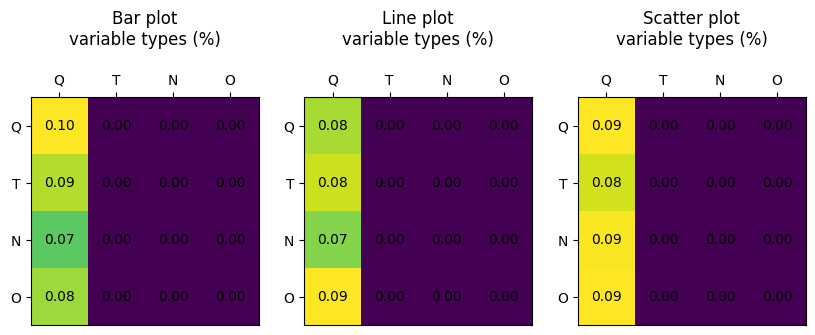

In [62]:
plot_matrixes(matrix_train_bar, matrix_train_line, matrix_train_point)

In [63]:
#plot_matrixes(matrix_test_bar, matrix_test_line, matrix_test_point)

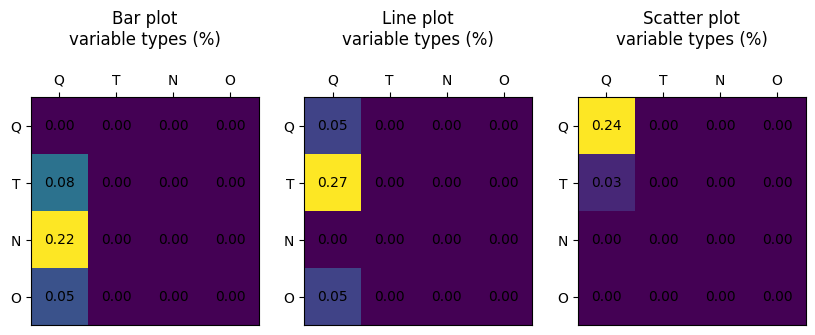

In [64]:
plot_matrixes(matrix_web_bar, matrix_web_line, matrix_web_point)

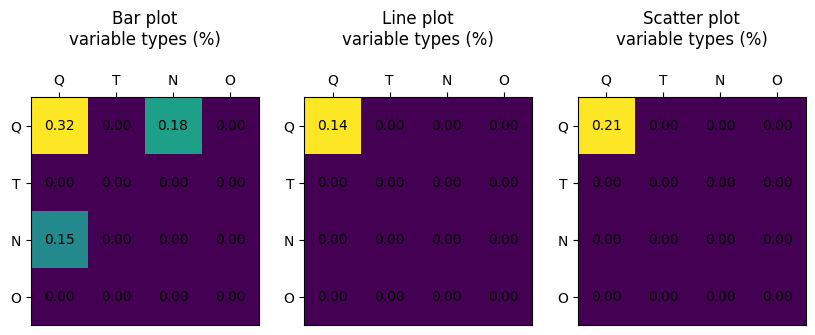

In [65]:
plot_matrixes(matrix_plotqa_bar, matrix_plotqa_line, matrix_plotqa_point)

**Análisis sobre PlotQA (matrices de confusión)**

In [66]:
lines = []

with open("data/model_visdecode_7_web.out", 'r') as file:
    for line in file: 
        if line != "\n": lines.append(line)

In [67]:
gold_lines = lines[0::2]
output_lines = lines[1::2]

confusion_matrix = {"bar": {}, "line": {}, "point": {}}

for key in confusion_matrix.keys():
    confusion_matrix[key] = {"x": np.zeros((4,4)), "y": np.zeros((4,4))}

for i in range(len(gold_lines)):

    out_mark_type = get_mark_type(output_lines[i])

    gold_x_type, gold_y_type = get_var_types(gold_lines[i])
    out_x_type, out_y_type = get_var_types(output_lines[i])

    types = ["quantitative", "temporal", "nominal", "ordinal"]

    confusion_matrix[out_mark_type]["x"][types.index(gold_x_type)][types.index(out_x_type)] += 1
    confusion_matrix[out_mark_type]["y"][types.index(gold_y_type)][types.index(out_y_type)] += 1

Text(0.5, 1.0, 'Scatter plot\n')

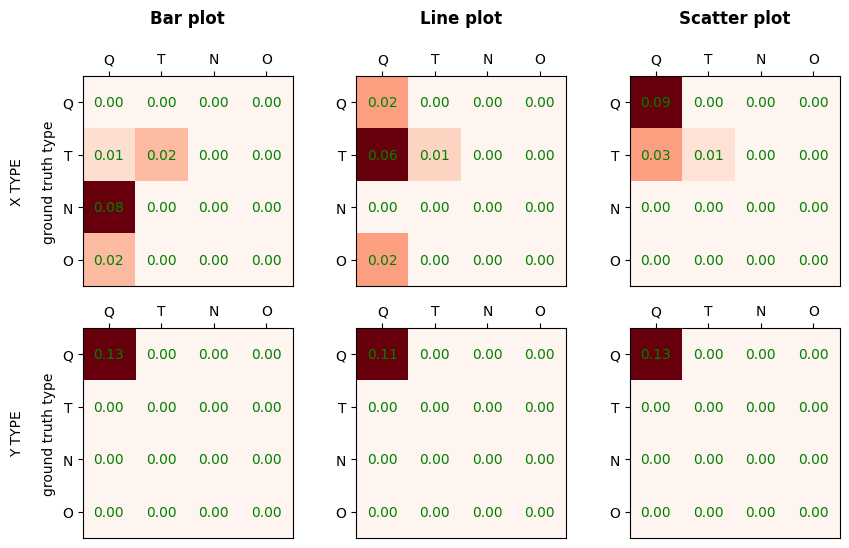

In [68]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6)) 

for i, key in enumerate(confusion_matrix.keys()):

    axes[0,i].imshow(confusion_matrix[key]["x"], cmap = "Reds")
    axes[1,i].imshow(confusion_matrix[key]["y"], cmap = "Reds")

    for x in range(4):
        for y in range(4):
            axes[0,i].text(y, x, f'{confusion_matrix[key]["x"][x, y] / 100  :.2f}', ha='center', va='center', color='green')
            axes[1,i].text(y, x, f'{confusion_matrix[key]["y"][x, y] / 100  :.2f}', ha='center', va='center', color='green')

for i in range(2):
    for j in range(3):

        axes[i,j].set_xticks(np.arange(4))
        axes[i,j].set_xticklabels(["Q","T","N","O"])
        axes[i,j].set_yticks(np.arange(4))
        axes[i,j].set_yticklabels(["Q","T","N","O"])
        axes[i,j].xaxis.tick_top()

axes[0,0].set_ylabel("X TYPE\n\nground truth type")
axes[1,0].set_ylabel("Y TYPE\n\nground truth type")

axes[0,0].set_title("Bar plot\n", fontweight = "bold")
axes[0,1].set_title("Line plot\n", fontweight = "bold")
axes[0,2].set_title("Scatter plot\n", fontweight = "bold")